In [1]:
# In case your notebook server doesn't run in your home folder.
import os
os.chdir("/home/petrbel/ubuntu-ranking-dataset-creator/statistics")

Author: Petr Belohlavek

Copyright: IBM 2016

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy
from scipy.stats import chisquare, ttest_ind
from utils import *

In [2]:
# replace with appropriate paths
train_n_uterrances = n_utterances_counts('../src/train.csv', '__eou__')
test_n_uterrances = n_utterances_counts('../src/test.csv', '__eou__')
valid_n_uterrances = n_utterances_counts('../src/valid.csv', '__eou__')

Compute max. number of utterances within a single context.

In [3]:
max_utt = max(max(train_n_uterrances), max(test_n_uterrances), max(valid_n_uterrances)) + 1
max_utt

163

Compute the *training* counts of the utterance numbers and their distribution

In [4]:
train_counts, train_distr = distribution(train_n_uterrances, max_utt=max_utt)
real_test_counts, test_distr = distribution(test_n_uterrances, max_utt=max_utt)
real_valid_counts, valid_distr = distribution(valid_n_uterrances, max_utt=max_utt)

In [5]:
min(train_n_uterrances)

2

In [6]:
max(train_n_uterrances)

162

In [7]:
numpy.mean(train_n_uterrances)

6.224113

In [8]:
numpy.std(train_n_uterrances)

5.212921096969625

In [9]:
min(test_n_uterrances)

2

In [10]:
max(test_n_uterrances)

58

In [11]:
numpy.mean(test_n_uterrances)

6.024524312896406

In [12]:
numpy.std(test_n_uterrances)

4.967263980752672

In [13]:
min(valid_n_uterrances)

2

In [14]:
max(valid_n_uterrances)

57

In [15]:
numpy.mean(valid_n_uterrances)

5.874846625766871

In [16]:
numpy.std(valid_n_uterrances)

4.86818909434257

We test whether the utterance distributions of *test* and *valid* datasets significantly differ from the *train* dataset.

In [17]:
expected_test_counts = train_distr * len(test_n_uterrances)
_, pvalue = chisquare(real_test_counts+1, expected_test_counts+1)
pvalue

1.0

And the same thing for *valid* dataset.

In [18]:
expected_valid_counts = train_distr * len(valid_n_uterrances)
_, pvalue = chisquare(real_valid_counts+1, expected_valid_counts+1)
pvalue

0.9284676169674212

We test whether the means of *test* and *valid* significantly differ from the mean of *train* dataset. Note that with sufficiently large amount of data we can proove any difference possible.

In [19]:
ttest_ind(train_n_uterrances, test_n_uterrances, equal_var=True)    # standard t-test

Ttest_indResult(statistic=5.221752166157902, pvalue=1.7727274160451965e-07)

In [20]:
ttest_ind(train_n_uterrances, test_n_uterrances, equal_var=False)   # Welch's test

Ttest_indResult(statistic=5.470029358885711, pvalue=4.554337645694917e-08)

In [21]:
ttest_ind(train_n_uterrances, valid_n_uterrances, equal_var=True)    # standard t-test

Ttest_indResult(statistic=9.291517554986777, pvalue=1.5238857722275943e-20)

In [22]:
ttest_ind(train_n_uterrances, valid_n_uterrances, equal_var=False)   # Welch's test

Ttest_indResult(statistic=9.92307945249262, pvalue=3.727381789084741e-23)

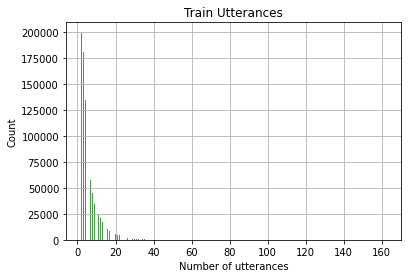

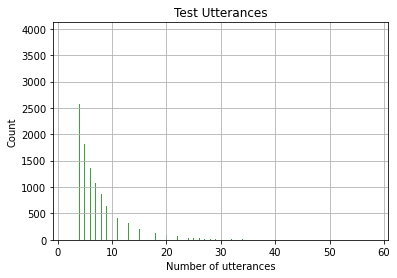

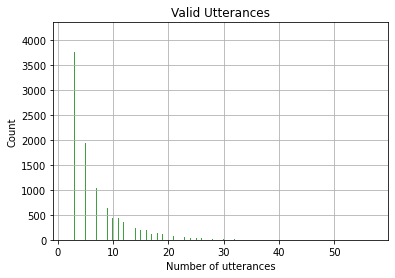

In [23]:
plot_histogram(train_n_uterrances, "Train Utterances", "Number of utterances", "Count")
plot_histogram(test_n_uterrances, "Test Utterances", "Number of utterances", "Count")
plot_histogram(valid_n_uterrances, "Valid Utterances", "Number of utterances", "Count")

In [24]:
train_n_turns = n_utterances_counts('../src/train.csv', '__eot__')
test_n_turns = n_utterances_counts('../src/test.csv', '__eot__')
valid_n_turns = n_utterances_counts('../src/valid.csv', '__eot__')

In [25]:
max_turns = max(max(train_n_turns), max(test_n_turns), max(valid_n_turns)) + 1
max_turns

19

In [26]:
train_counts, train_distr = distribution(train_n_turns, max_utt=max_turns)
real_test_counts, test_distr = distribution(test_n_turns, max_utt=max_turns)
real_valid_counts, valid_distr = distribution(valid_n_turns, max_utt=max_turns)

In [27]:
min(train_n_turns)

2

In [28]:
max(train_n_turns)

18

In [29]:
numpy.mean(train_n_turns)

3.955744

In [30]:
numpy.std(train_n_turns)

2.97297652302604

In [31]:
min(test_n_turns)

2

In [32]:
max(test_n_turns)

18

In [33]:
numpy.mean(test_n_turns)

3.8424418604651165

In [34]:
numpy.std(test_n_turns)

2.8532215313720224

In [35]:
min(valid_n_turns)

2

In [36]:
max(valid_n_turns)

18

In [37]:
numpy.mean(valid_n_turns)

3.8026584867075663

In [38]:
numpy.std(valid_n_turns)

2.8098048254989707

In [39]:
expected_test_counts = train_distr * len(test_n_turns)
_, pvalue = chisquare(real_test_counts+1, expected_test_counts+1)
pvalue

0.003252627992851334

In [40]:
expected_valid_counts = train_distr * len(valid_n_turns)
_, pvalue = chisquare(real_valid_counts+1, expected_valid_counts+1)
pvalue

7.954989312471796e-11

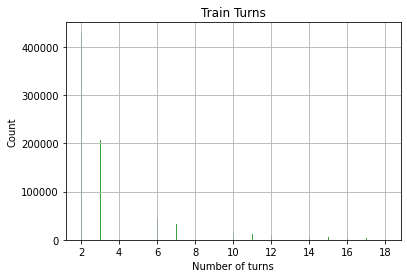

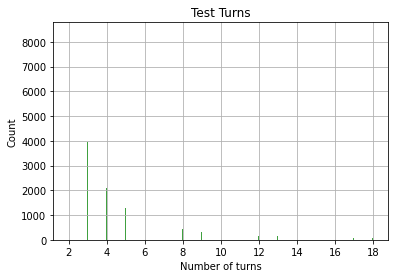

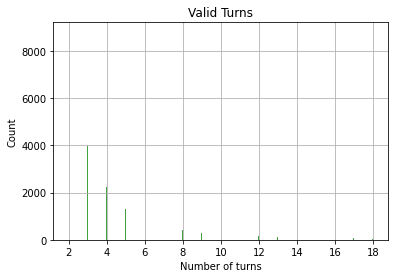

In [41]:
plot_histogram(train_n_turns, "Train Turns", "Number of turns", "Count")
plot_histogram(test_n_turns, "Test Turns", "Number of turns", "Count")
plot_histogram(valid_n_turns, "Valid Turns", "Number of turns", "Count")

In [42]:
pos_utterances, pos_turns, pos_words, neg_utterances, neg_turns, neg_words = train_stats("/home/petrbel/ubuntu-ranking-dataset-creator/src/train_stem.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/petrbel/ubuntu-ranking-dataset-creator/src/train_stem.csv'

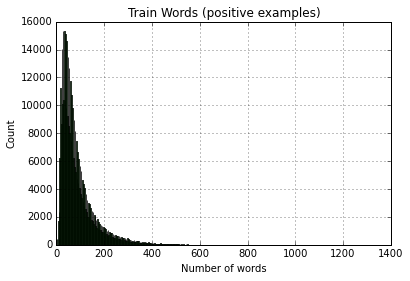

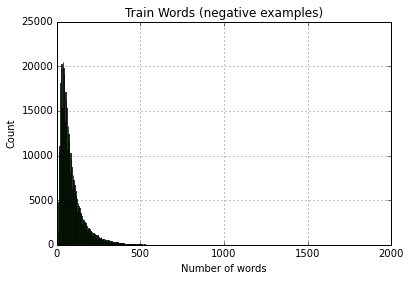

In [44]:
plot_histogram(pos_words, "Train Words (positive examples)", "Number of words", "Count")
plot_histogram(neg_words, "Train Words (negative examples)", "Number of words", "Count")

Utterances

In [45]:
ttest_ind(pos_utterances, neg_utterances)

Ttest_indResult(statistic=-0.72871878180491056, pvalue=0.46617389154144917)

Turns

In [46]:
ttest_ind(pos_turns, neg_turns)

Ttest_indResult(statistic=-0.61394593748394155, pvalue=0.53925120833330875)

Words

In [47]:
ttest_ind(pos_words, neg_words)

Ttest_indResult(statistic=-0.5451388688023554, pvalue=0.58565814708797381)